**Reference**

https://www.kaggle.com/code/shehabmagdy710/sequential-models-rnn-lstm-gru-98-accuracy

In [ ]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()   # Choose kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasman98","key":"eda9bde3c4f16909d2d9bfdd4b1d2d95"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.12GB/s]


In [4]:
!unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

df_true['Label'] = 1
df_fake['Label'] = 0

In [6]:
df_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df = pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


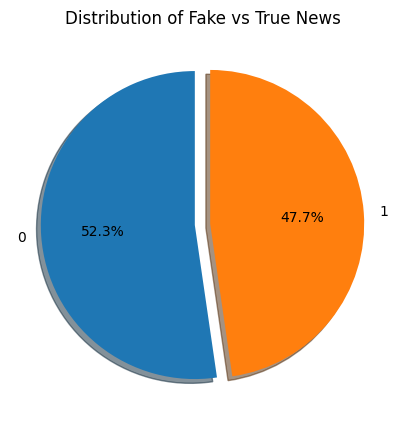

In [9]:
df['Label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.05, 0.05],
    figsize=(5,5)
)

plt.title("Distribution of Fake vs True News")
plt.ylabel("")  # remove y-label
plt.show()

In [38]:
import re
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [13]:
def custom_standardization(text):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, r"http\S+", "")
    text = tf.strings.regex_replace(text, r"[^a-z\s]", "")
    text = tf.strings.regex_replace(text, r"\s+", " ")
    return text

In [17]:
from sklearn.model_selection import train_test_split

X = df[['title','text']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
X_train.sample(5)

,title,text,Combined_Title_Text
41468,tf.Tensor(b'breaking crookedhillary told fbi s...,tf.Tensor(b'she s the most crooked criminal to...,tf.Tensor(b'breaking crookedhillary told fbi s...
2233,tf.Tensor(b'white house plans to release tax r...,tf.Tensor(b'washington reuters the white house...,tf.Tensor(b'white house plans to release tax r...
5647,tf.Tensor(b'department of homeland security su...,tf.Tensor(b'washington reuters the department ...,tf.Tensor(b'department of homeland security su...
34307,tf.Tensor(b'hillary supporter and muslim immig...,tf.Tensor(b'this story is a perfect example of...,tf.Tensor(b'hillary supporter and muslim immig...
36436,tf.Tensor(b'breaking whos laughing now house g...,tf.Tensor(b'does this mean republicans in the ...,tf.Tensor(b'breaking whos laughing now house g...


In [23]:
X_test.sample(5)

,title,text,Combined_Title_Text
18970,tf.Tensor(b'un launches new plan to end libyas...,tf.Tensor(b'tunis reuters the united nations b...,tf.Tensor(b'un launches new plan to end libyas...
5804,tf.Tensor(b'us to apply extreme vetting in ref...,tf.Tensor(b'sydney reuters the united states w...,tf.Tensor(b'us to apply extreme vetting in ref...
43270,tf.Tensor(b'hillary clinton we all know shes d...,tf.Tensor(b' she was an unethical dishonest la...,tf.Tensor(b'hillary clinton we all know shes d...
21011,tf.Tensor(b'taiwan appoints new premier to dri...,tf.Tensor(b'taipei reuters taiwan has appointe...,tf.Tensor(b'taiwan appoints new premier to dri...
22262,tf.Tensor(b' trump goes into full denial mode ...,tf.Tensor(b'donald trump just refuses to admit...,tf.Tensor(b' trump goes into full denial mode ...


In [21]:
#Cleaning data

X_train['title'] = X_train['title'].apply(custom_standardization)
X_train['text'] = X_train['text'].apply(custom_standardization)

X_test['title'] = X_test['title'].apply(custom_standardization)
X_test['text'] = X_test['text'].apply(custom_standardization)

X_train["Combined_Title_Text"] = X_train["title"] + " " + X_train["text"]
X_test["Combined_Title_Text"] = X_test["title"] + " " + X_test["text"]

In [33]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train["Combined_Title_Text"].astype(str).values, y_train))
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_test["Combined_Title_Text"].astype(str).values, y_test))
val_ds = val_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [34]:
MAX_VOCAB = 10000
SEQ_LENGTH = 200

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=MAX_VOCAB,
    output_mode='int',
    output_sequence_length=SEQ_LENGTH
)

In [36]:
vectorize_layer.adapt(train_ds.map(lambda text, label: text))

In [41]:
vectorize_layer.get_vocabulary()[:5]

['', '[UNK]', np.str_('the'), np.str_('to'), np.str_('of')]

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    vectorize_layer,  # preprocessing inside the model
    Embedding(input_dim=MAX_VOCAB, output_dim=64, mask_zero=True),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [46]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 196s 172ms/step - accuracy: 0.8619 - loss: 0.3319 - val_accuracy: 0.9723 - val_loss: 0.1076
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 190s 169ms/step - accuracy: 0.9683 - loss: 0.1186 - val_accuracy: 0.9527 - val_loss: 0.2044
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 191s 170ms/step - accuracy: 0.9606 - loss: 0.1263 - val_accuracy: 0.9521 - val_loss: 0.1553
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 200s 178ms/step - accuracy: 0.9734 - loss: 0.0859 - val_accuracy: 0.9793 - val_loss: 0.0647
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 191s 168ms/step - accuracy: 0.9770 - loss: 0.0803 - val_accuracy: 0.9873 - val_loss: 0.0464


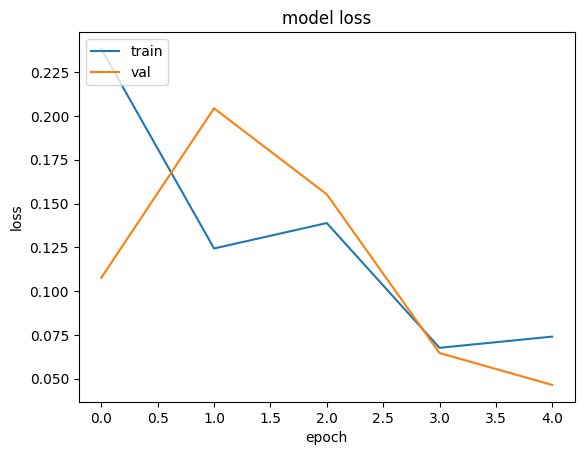

In [47]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [51]:
lstm_loss, lstm_accuracy = model.evaluate(val_ds)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9878 - loss: 0.0458
LSTM Accuracy: 0.9873
